Question 1: Python Basics and Data Manipulation
Objective: Demonstrate basic Python skills and data manipulation using Pandas.

Task:

- Load a given CSV file containing metal prices into a Pandas DataFrame.
- Filter the data to include only 'Copper' and 'Zinc' for the year 2021.
- Calculate the average price per month for each metal and plot it.

# Task 1: Load data

Load data modelling libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Explore the data

Import the data, skipping first 7 columns and set new column names for easier intepretation.

In [2]:
# Import csv data
df = pd.read_csv("../data/MarketData.csv", skiprows=6) # Skip the first 6 rows
df.columns = ["Dates","COPPER", "ALUMINUM", "ZINC","LEAD","TIN","Genric Future"]

# Set Dates columns as index and change data type
df = df.set_index('Dates')
df.index = pd.to_datetime(df.index)

Next we look at the data rows:

In [3]:
# First 5 rows
df.head(5)

,COPPER,ALUMINUM,ZINC,LEAD,TIN,Genric Future
Dates,,,,,,
2010-01-01,7375.0,2230.0,2560.0,2432.0,16950,79.36
2010-04-01,7500.0,2267.0,2574.0,2515.0,17450,81.51
2010-05-01,7485.0,2302.0,2575.0,2522.5,17375,81.77
2010-06-01,7660.0,2377.0,2718.0,2680.0,17825,83.18
2010-07-01,7535.0,2310.0,2607.0,2599.0,17475,82.66


In [4]:
# Last 5 rows
df.tail(5)

,COPPER,ALUMINUM,ZINC,LEAD,TIN,Genric Future
Dates,,,,,,
2022-12-26,8349.5,2389.5,2965.0,2273.5,23934,79.56
2022-12-27,8349.5,2389.5,2965.0,2273.5,23934,79.53
2022-12-28,8443.0,2381.0,3005.5,2218.0,24734,78.96
2022-12-29,8418.0,2405.0,2984.5,2272.5,24915,78.40
2022-12-30,8372.0,2378.0,2972.5,2293.0,24808,80.26


In [5]:
# Sample 10 random rows
df.sample(10)

,COPPER,ALUMINUM,ZINC,LEAD,TIN,Genric Future
Dates,,,,,,
2018-06-26,6713.0,2157.5,2840.0,2411.0,20100,70.53
2011-11-08,8881.0,2413.0,2186.0,2385.0,23605,85.72
2010-11-03,7464.0,2235.0,2340.0,2251.0,17350,82.11
2012-08-27,7640.0,1918.0,1879.0,1971.0,20900,95.47
2011-03-02,9930.0,2528.0,2472.0,2554.5,30545,90.54
2011-07-09,9092.0,2404.0,2240.0,2415.0,24375,89.34
2011-06-07,9521.0,2556.0,2380.0,2700.0,26745,96.65
2021-10-19,10149.5,3112.0,3508.0,2376.0,37710,82.96
2020-11-18,7088.5,1998.0,2747.0,1948.5,18845,41.82


By manually checking with the csv file, the first and last 5 rows match. Our import was correct.  However, the Dates are in random order, which can complicate future analysis. We'll sort the Dates column next.

In [6]:
# Sort datatime by ascending order
df.sort_index(ascending=True, inplace=True)
df

,COPPER,ALUMINUM,ZINC,LEAD,TIN,Genric Future
Dates,,,,,,
2010-01-01,7375.0,2230.0,2560.0,2432.0,16950,79.36
2010-01-02,6790.0,2085.0,2145.0,2045.0,16150,74.43
2010-01-03,7400.0,2143.0,2220.0,2170.0,17050,78.70
2010-01-04,7885.0,2352.0,2403.0,2210.0,18450,84.87
2010-01-06,6750.0,1990.5,1853.0,1750.0,17800,72.58
...,...,...,...,...,...,...
2022-12-26,8349.5,2389.5,2965.0,2273.5,23934,79.56
2022-12-27,8349.5,2389.5,2965.0,2273.5,23934,79.53
2022-12-28,8443.0,2381.0,3005.5,2218.0,24734,78.96


Next we get some basic information about data in each column.

In [7]:
# Basic statistics about data
df.describe()

,COPPER,ALUMINUM,ZINC,LEAD,TIN,Genric Future
count,3391.000000,3391.000000,3391.000000,3391.000000,3391.000000,3391.000000
mean,7073.268136,2044.883368,2425.526983,2101.813624,21815.800354,71.265609
std,1445.298014,371.836629,532.255750,242.304832,5901.536275,22.736368
min,4331.000000,1435.500000,1468.000000,1554.000000,13250.000000,-37.630000
25%,5957.500000,1791.000000,2015.250000,1933.750000,18195.000000,51.635000
50%,6939.000000,1970.000000,2302.000000,2090.000000,20400.000000,70.050000
75%,7988.750000,2231.000000,2774.500000,2270.250000,23175.000000,92.300000
max,10674.000000,3849.000000,4498.500000,2855.000000,48650.000000,123.700000


In [8]:
# Check for data types of each columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3391 entries, 2010-01-01 to 2022-12-30
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   COPPER         3391 non-null   float64
 1   ALUMINUM       3391 non-null   float64
 2   ZINC           3391 non-null   float64
 3   LEAD           3391 non-null   float64
 4   TIN            3391 non-null   int64  
 5   Genric Future  3391 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 185.4 KB
None


In [9]:
# Check for columns with null data
df.isnull().any()

COPPER           False
ALUMINUM         False
ZINC             False
LEAD             False
TIN              False
Genric Future    False
dtype: bool

# Task 2: Filter the data to include only 'Copper' and 'Zinc' for the year 2021.

In [10]:
# Filter data for the year 2021 only
df_2021=df.loc[(df.index < "01-01-2022") & (df.index >= "01-01-2021")]

# Filter columns 'Copper' and 'Zinc'.
labels = ["COPPER", "ZINC"]
df_filtered = df_2021.loc[:, labels]
print(df_filtered)

             COPPER    ZINC
Dates                      
2021-01-01   7766.0  2751.0
2021-01-02   7798.5  2570.5
2021-01-03   9044.0  2816.0
2021-01-04   8790.0  2774.5
2021-01-06  10245.0  3064.0
...             ...     ...
2021-12-27   9568.0  3519.0
2021-12-28   9568.0  3519.0
2021-12-29   9680.5  3513.0
2021-12-30   9691.5  3532.5
2021-12-31   9720.5  3534.0

[261 rows x 2 columns]


# Task 3: Calculate the average price per month for each metal and plot it.

Create "day", "month", "year" columns.

In [11]:
def create_time_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df["day"] = df.index.day    
    df["month"] = df.index.month
    df["year"] = df.index.year
    
    return df

df_filtered = create_time_features(df_filtered)
print(df_filtered)

             COPPER    ZINC  day  month  year
Dates                                        
2021-01-01   7766.0  2751.0    1      1  2021
2021-01-02   7798.5  2570.5    2      1  2021
2021-01-03   9044.0  2816.0    3      1  2021
2021-01-04   8790.0  2774.5    4      1  2021
2021-01-06  10245.0  3064.0    6      1  2021
...             ...     ...  ...    ...   ...
2021-12-27   9568.0  3519.0   27     12  2021
2021-12-28   9568.0  3519.0   28     12  2021
2021-12-29   9680.5  3513.0   29     12  2021
2021-12-30   9691.5  3532.5   30     12  2021
2021-12-31   9720.5  3534.0   31     12  2021

[261 rows x 5 columns]


Calculate the average price per month for each metal.

In [12]:
df_grouped = df_filtered.groupby("month")[labels].mean()
df_grouped

,COPPER,ZINC
month,,
1,8432.826087,2795.913043
2,9057.000000,2907.131579
3,9091.476190,2877.904762
4,9337.477273,2884.522727
5,9687.113636,2958.522727
6,9358.071429,2943.166667
7,9474.045455,2982.386364
8,9227.804348,2990.086957
9,9266.478261,3031.500000


Plot mean price:

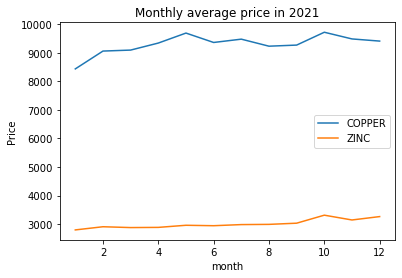

In [13]:
df_grouped.plot(title="Monthly average price in 2021", xlabel="month", ylabel="Price")
plt.show()